# Individual Assignment

Starting with the list of imports and define risk-free rate and trading days

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf

from scipy.optimize import minimize

plt.style.use("ggplot")

RFR = 0.0441
TRADING_DAYS = 252

## Data Retrieval

Importing daily historical data from Yahoo Finance using `yf.download`, save it as `.csv` file and import save as `.csv`. A list of ten stocks was chosen, this includes the magnificent 7, Strategy, JP Morgan and Coinbase, covering the period from January 1, 2020 to December 31, 2024.

In [23]:
tickers = ["AAPL", "MSFT", "AMZN", "META", "TSLA", "NVDA", "GOOGL", "MSTR", "JPM", "COIN"]
groups = []

for ticker in tickers:
    data = yf.download(ticker, start="2020-01-01", end="2024-12-31", auto_adjust=False)
    data.to_csv('ten_stocks_2020_2024.csv')
    data = pd.read_csv('ten_stocks_2020_2024.csv', header=[0,1], index_col=0, parse_dates=True)
    data.columns = data.columns.droplevel(1)
    data.insert(0, "Ticker", ticker)
    groups.append(data)

df = pd.concat(groups)
df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Price,Ticker,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,
2020-01-02,AAPL,72.620834,75.087502,75.150002,73.797501,74.059998,135480400
2020-01-03,AAPL,71.914825,74.357498,75.144997,74.125000,74.287498,146322800
2020-01-06,AAPL,72.487846,74.949997,74.989998,73.187500,73.447502,118387200
2020-01-07,AAPL,72.146942,74.597504,75.224998,74.370003,74.959999,108872000
2020-01-08,AAPL,73.307510,75.797501,76.110001,74.290001,74.290001,132079200
...,...,...,...,...,...,...,...
2024-12-23,COIN,268.149994,268.149994,275.329987,263.070007,274.519989,6853500
2024-12-24,COIN,279.619995,279.619995,284.000000,271.859985,273.220001,4805100
2024-12-26,COIN,274.410004,274.410004,279.239990,271.390015,275.579987,4410400


### Data Cleaning

To check if the DataFrame has duplicates:

In [24]:
print(f"The number of duplicate rows: {df.duplicated().sum()}")

The number of duplicate rows: 0


Check for missing values in the DataFrame:

In [25]:
print(f"The number of missing values: {df.isnull().sum().sum()}")


The number of missing values: 0


Since there are no duplicate and missing data, the DataFrame is cleaned.

## Data Exploration

Head and tail of the wide data frame that shows the closing price for each stock.

In [26]:
df.shape
pivot_df = df.pivot_table(index=df.index, columns="Ticker", values="Close")

print("Head of dataframe of closing prices")
display(pivot_df.head())

print("Tail of dataframe of closing prices")
display(pivot_df.tail())

Head of dataframe of closing prices


Ticker,AAPL,AMZN,COIN,GOOGL,JPM,META,MSFT,MSTR,NVDA,TSLA
Date,,,,,,,,,,
2020-01-02,75.087502,94.900497,NaN,68.433998,141.089996,209.779999,160.619995,14.431,5.99775,28.684000
2020-01-03,74.357498,93.748497,NaN,68.075996,138.339996,208.669998,158.619995,14.357,5.90175,29.534000
2020-01-06,74.949997,95.143997,NaN,69.890503,138.229996,212.600006,159.029999,14.425,5.92650,30.102667
2020-01-07,74.597504,95.343002,NaN,69.755501,135.880005,213.059998,157.580002,14.387,5.99825,31.270666
2020-01-08,75.797501,94.598503,NaN,70.251999,136.940002,215.220001,160.089996,14.371,6.00950,32.809334


Tail of dataframe of closing prices


Ticker,AAPL,AMZN,COIN,GOOGL,JPM,META,MSFT,MSTR,NVDA,TSLA
Date,,,,,,,,,,
2024-12-23,255.270004,225.059998,268.149994,194.630005,238.389999,599.849976,435.250000,332.230011,139.669998,430.600006
2024-12-24,258.200012,229.050003,279.619995,196.110001,242.309998,607.750000,439.329987,358.179993,140.220001,462.279999
2024-12-26,259.019989,227.050003,274.410004,195.600006,243.139999,603.349976,438.109985,341.049988,139.929993,454.130005
2024-12-27,255.589996,223.750000,265.709991,192.759995,241.169998,599.809998,430.529999,330.000000,137.009995,431.660004
2024-12-30,252.199997,221.300003,255.559998,191.240005,239.320007,591.239990,424.829987,302.959991,137.490005,417.410004


A single plot showing the closing price of all ten stocks over the five year period are shown.

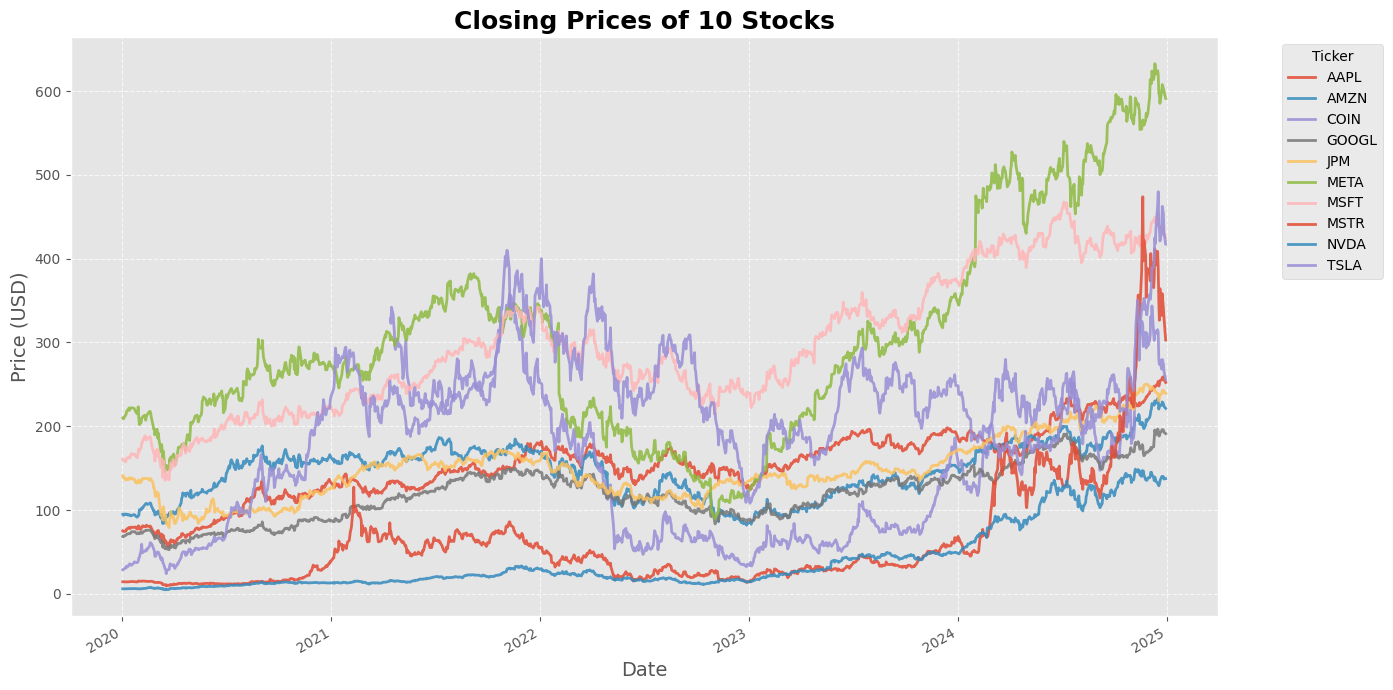

In [27]:
plt.figure(figsize=(14, 7))
pivot_df.plot(ax=plt.gca(), linewidth=2, alpha=0.85)
plt.title('Closing Prices of 10 Stocks', fontsize=18, fontweight='bold')
plt.ylabel('Price (USD)', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.legend(title='Ticker', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## Backtesting

The Bollinger Bands Mean Reversion Strategy is implemented for each stock. The Bollinger Band Mean Reversion Strategy includes the following:
- Calculate Bollinger Bands on closing prices, comprising of the middle band (20-day simple moving average), and the upper and lower bands (at 2 standard deviations from the middle band).
- Entry Signal:
    - Buy signal when asset's closing price falls below the Bollinger Band
    - Sell signal when asset's closing price exceeds the upper Bollinger Band
- Exit Signal:
    - Exit buy position when price rises back to middle band
    - Exit sell position when price decline back to the middle band

In [28]:
def bollinger_band(dfi):
    # Bollinger Bands calculation
    dfi["SMA"] = dfi["Close"].rolling(window=20).mean()
    dfi["Dev"] = dfi["Close"].rolling(window=20).std()
    dfi["HighBand"] = dfi["SMA"] + 2 * dfi["Dev"]
    dfi["MiddleBand"] = dfi["SMA"]
    dfi["LowBand"] = dfi["SMA"]  - 2 * dfi["Dev"]

    dfi["Signal"] = 0

    # Entry Signals
    dfi["Signal"] = np.where(dfi.LowBand > dfi.Close, 1, dfi.Signal)
    dfi["Signal"]= np.where(dfi.Close > dfi.HighBand, -1, dfi.Signal)

    # Exit Signals
    dfi["Signal"] = np.where((dfi.Signal.shift(1) == 1) & (dfi.Close >= dfi.SMA), 0, dfi.Signal)
    dfi["Signal"] = np.where((dfi.Signal.shift(1) == -1) & (dfi.Close <= dfi.SMA), 0, dfi.Signal)

    dfi["Signal"] = np.where(dfi.SMA.isna(), 0, dfi.Signal)

   # dfi["Position"] = dfi.Signal.replace(to_replace=0, method='ffill').fillna(0)
    dfi["Position"] = dfi.Signal.shift()

    return dfi


The simple daily return and the daily return of the Strategy are then calculated.

In [30]:
def strategy_returns(Close, signals):
    daily_ret = Close.pct_change().fillna(0)
    strat_ret = daily_ret * signals.shift(1).fillna(0)
    return daily_ret, strat_ret

results = {}

for ticker in tickers:
    ticker_df = df[df['Ticker'] == ticker].copy()
    strat = bollinger_band(ticker_df)
    daily_ret, strat_ret = strategy_returns(ticker_df['Close'], strat['Signal'])
    results[ticker] = {
        'daily_ret': daily_ret,
        'strat_ret': strat_ret,
        'cumulative_bh': (1 + daily_ret).cumprod() - 1,
        'cumulative_strat': (1 + strat_ret).cumprod() - 1
    }

The end-of-period cumulative return for the strategy vs buy and hold are displayed.

In [ ]:
table_data = []

for ticker in tickers:

    bh_return = results[ticker]['cumulative_bh'][-1]
    strat_return = results[ticker]['cumulative_strat'][-1]
    
    table_data.append({
        'Ticker': ticker,
        'Buy+Hold Return (%)': bh_return * 100,
        'Strategy Return (%)': strat_return * 100
    })

# Convert to DataFrame
df_results = pd.DataFrame(table_data)

df_results['Buy+Hold Return (%)'] = df_results['Buy+Hold Return (%)'].round(2)
df_results['Strategy Return (%)'] = df_results['Strategy Return (%)'].round(2)

print(df_results)

  Ticker  Buy+Hold Return (%)  Strategy Return (%)
0   AAPL               235.87                17.96
1   MSFT               164.49                72.75
2   AMZN               133.19               -12.10
3   META               181.84                90.24
4   TSLA              1355.20               -85.62
5   NVDA              2192.36                37.63
6  GOOGL               179.45                46.89
7   MSTR              1999.37               -80.75
8    JPM                69.62                19.04
9   COIN               -22.15               -38.75


/tmp/ipykernel_4241/3978197041.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bh_return = results[ticker]['cumulative_bh'][-1]
/tmp/ipykernel_4241/3978197041.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  strat_return = results[ticker]['cumulative_strat'][-1]


## Portfolio Management

The correlation matrix of the simply daily return of the portfolio is visualised.

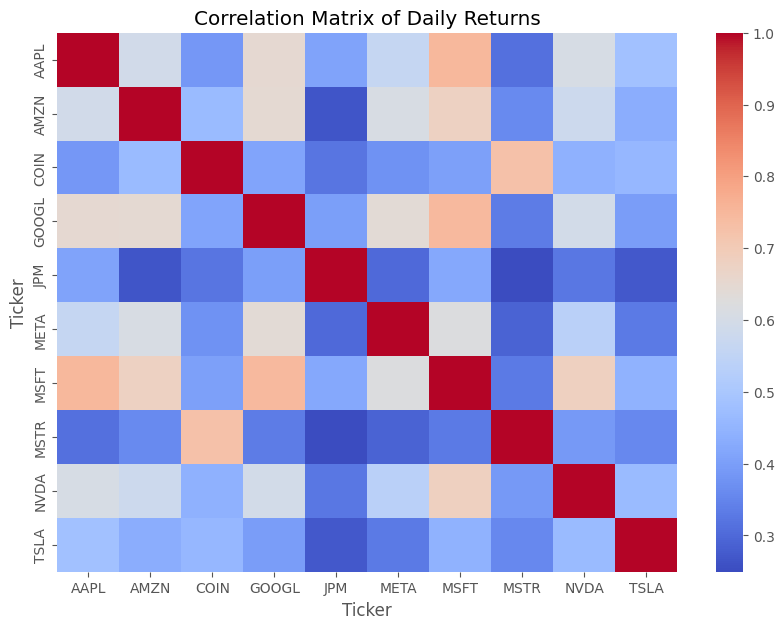

In [ ]:
correlation_matrix = pivot_df.pct_change().corr()

fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', ax=ax)
ax.set_title('Correlation Matrix of Daily Returns')
plt.show()

A portfolio of the ten stockes with equal initial weights are created. The portfolio daily returns are displayed below.

In [ ]:
pivot_df.index = pd.to_datetime(pivot_df.index, dayfirst=True)
pivot_df.sort_index(inplace=True)

pivot_df.iloc[:, 0:10]
df = pivot_df.loc[:, ["AAPL", "MSFT", "AMZN", "META", "TSLA", "NVDA", "GOOGL", "MSTR", "JPM", "COIN"]]

weights = np.ones(10) / 10

returns = df.pct_change()
returns.dropna(inplace=True)

p_returns = returns.dot(weights)
p_returns.name = "Portfolio Daily Returns"
p_returns


Date
2021-04-15    0.014485
2021-04-16   -0.000661
2021-04-19   -0.020051
2021-04-20   -0.008010
2021-04-21    0.005032
                ...   
2024-12-23   -0.002043
2024-12-24    0.027419
2024-12-26   -0.010090
2024-12-27   -0.020802
2024-12-30   -0.021694
Name: Portfolio Daily Returns, Length: 934, dtype: float64

Using the data of the portfolio daily returns, the cumulative return of the ten stock portfolio are shown in the table below and the end-of-period cumulative return are displayed.

In [31]:
cumulative_return = (1 + p_returns).cumprod() - 1
final_cumulative_return = cumulative_return.iloc[-1]
print(f"End-of-period Cumulative portfolio return: {final_cumulative_return: .4%}")
cumulative_return

End-of-period Cumulative portfolio return:  176.5629%


Date
2021-04-15    0.014485
2021-04-16    0.013814
2021-04-19   -0.006514
2021-04-20   -0.014472
2021-04-21   -0.009513
                ...   
2024-12-23    1.838610
2024-12-24    1.916442
2024-12-26    1.887014
2024-12-27    1.826959
2024-12-30    1.765629
Name: Portfolio Daily Returns, Length: 934, dtype: float64

The daily standard deviation of the portfolio returns are calculated and displayed as shown below.

In [33]:
p_std = p_returns.std()
print(f"Annualized Volatility: {p_std: .2}")

Annualized Volatility:  0.022


## Portfolio Optimisation

Portfolio optimisation by maximising the Sharpe Ratio is first implemented. The optimal weights of each stock are shown as a percentage, and corresponds to each stock in the following order Apple, Microsoft, Amazon, Meta, Tesla, Nvidia, Alphabet, Strategy, JP Morgan and Coinbase.

In [ ]:
def negative_sharpe(weights):
    p_returns = np.dot(returns, weights)
    annualised_returns = p_returns.mean() * TRADING_DAYS
    annualised_volatility = p_returns.std() * np.sqrt(TRADING_DAYS)
    sharpe = (annualised_returns - RFR) / annualised_volatility

    return -sharpe

In [34]:
cons = {"type": "eq", "fun": lambda x: sum(x) - 1}

bounds = tuple((0, 1) for x in range(10))

init_weights = np.ones(10) / 10

optimal = minimize(negative_sharpe, init_weights, bounds=bounds, constraints=cons)
opt_weights = optimal.x
opt_weights * 100

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.54233680e-14,
       0.00000000e+00, 8.43349456e+01, 0.00000000e+00, 1.40066679e+01,
       1.65838649e+00, 3.70451938e-14])

The cumulative daily return for the maximised Sharpe Ratio are displayed.

In [ ]:
port_daily_returns_opt = returns.dot(opt_weights)
port_cumulative_daily_return_opt = (1 + port_daily_returns_opt).cumprod() -1
port_cumulative_daily_return_opt.name = "Returns for maximising the Sharpe Ratio Portfolio"
port_cumulative_daily_return_opt

Date
2021-04-15    0.048480
2021-04-16    0.027062
2021-04-19   -0.014625
2021-04-20   -0.023359
2021-04-21   -0.012098
                ...   
2024-12-23    8.538232
2024-12-24    8.676861
2024-12-26    8.595710
2024-12-27    8.382002
2024-12-30    8.300852
Name: Returns for maximising the Sharpe Ratio Portfolio, Length: 934, dtype: float64

For the AI-generated portfolio optimisation, the Maximise return for Target Risk Strategy is implemented. This strategy is chosen due to its ability to achieve the highest possible expected return while ensuring that the portfolio's overall risk does not exceed a predefined threshold. The maximise return for Target Risk Strategy includes the following:
- Inputs: expected returns, covariance matrix of returns and the maximum allowed volatility
- Define the objective function which calculated the negative of the expected return of the portfolio
- Define the volatility constraint to ensure the portfolio's volatility stays below the target
- Define weight sum constraint to ensure the weights sum to 1
- Set Bounds and Initial Guess
- Run the optimisation and output the result

The optimal portfolio found by the Maximise return for Target Risk Strategy, the maximum expected return and the portfolio volatility are displayed below.

In [ ]:
## Maximise return for Target Risk

target_volatility = 0.20
num_assets = len(pivot_df.columns)

# Calculate expected returns and covariance matrix
expected_returns = returns.mean() * TRADING_DAYS
cov_matrix = returns.cov() * TRADING_DAYS

# Objective Function: Negative Expected Return
def negative_portfolio_return(weights, expected_returns):
	return -np.dot(weights, expected_returns)

# Constraint: Portfolio volatility must be ≤ target
def volatility_constraint(weights, cov_matrix, target_volatility):
	portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
	return target_volatility - portfolio_volatility  # Must be ≥ 0

# Constraint: Weights must sum to 1
def weight_sum_constraint(weights):
	return np.sum(weights) - 1

# Bounds and Initial Guess
bounds = tuple((0, 1) for _ in range(num_assets))
initial_weights = np.array([1.0 / num_assets] * num_assets)

# Constraints Dictionary
constraints = [
	{'type': 'eq', 'fun': weight_sum_constraint},
	{'type': 'ineq', 'fun': lambda w: volatility_constraint(w, cov_matrix, target_volatility)}
]

# Run Optimisation
result = minimize(
	negative_portfolio_return,
	initial_weights,
	args=(expected_returns,),
	method='SLSQP',
	bounds=bounds,
	constraints=constraints
)

# Output Results
if result.success:
	optimal_weights = result.x
	max_return = -result.fun
	final_volatility = np.sqrt(np.dot(optimal_weights.T, np.dot(cov_matrix, optimal_weights)))
	print("Optimal Portfolio Weights:", optimal_weights)
	print("Maximum Expected Return (under target risk):", max_return)
	print("Portfolio Volatility:", final_volatility)
else:
	print("Optimization failed:", result.message)


Optimal Portfolio Weights: [2.74274342e-01 2.17816118e-01 3.35704568e-17 4.12149291e-17
 6.15936948e-17 1.62625823e-02 2.28800035e-02 0.00000000e+00
 4.68766954e-01 5.04746933e-17]
Maximum Expected Return (under target risk): 0.18266775132839058
Portfolio Volatility: 0.20000001631603587


The cumulative daily return of the Maximise Return for Target Risk Strategy are displayed.

In [ ]:
port_daily_returns_opt_maxret = returns.dot(optimal_weights)
port_cumulative_daily_return_opt_maxret = (1 + port_daily_returns_opt_maxret).cumprod() -1
port_cumulative_daily_return_opt_maxret.name = "Maximise Return for Target Risk Portfolio Returns"
port_cumulative_daily_return_opt_maxret


Date
2021-04-15    0.012797
2021-04-16    0.016420
2021-04-19    0.013614
2021-04-20   -0.001197
2021-04-21    0.005740
                ...   
2024-12-23    0.840958
2024-12-24    0.865141
2024-12-26    0.868458
2024-12-27    0.846279
2024-12-30    0.827372
Name: Maximise Return for Target Risk Portfolio Returns, Length: 934, dtype: float64

A visual plot of three strategies:
- Cumulative Sharpe Ratio optimised portfolio returns
- Cumulative Maximum Return for Target Risk Strategy portfolio returns
- Cumulative initial (equal-weighting) portfolio returns

are shown below.

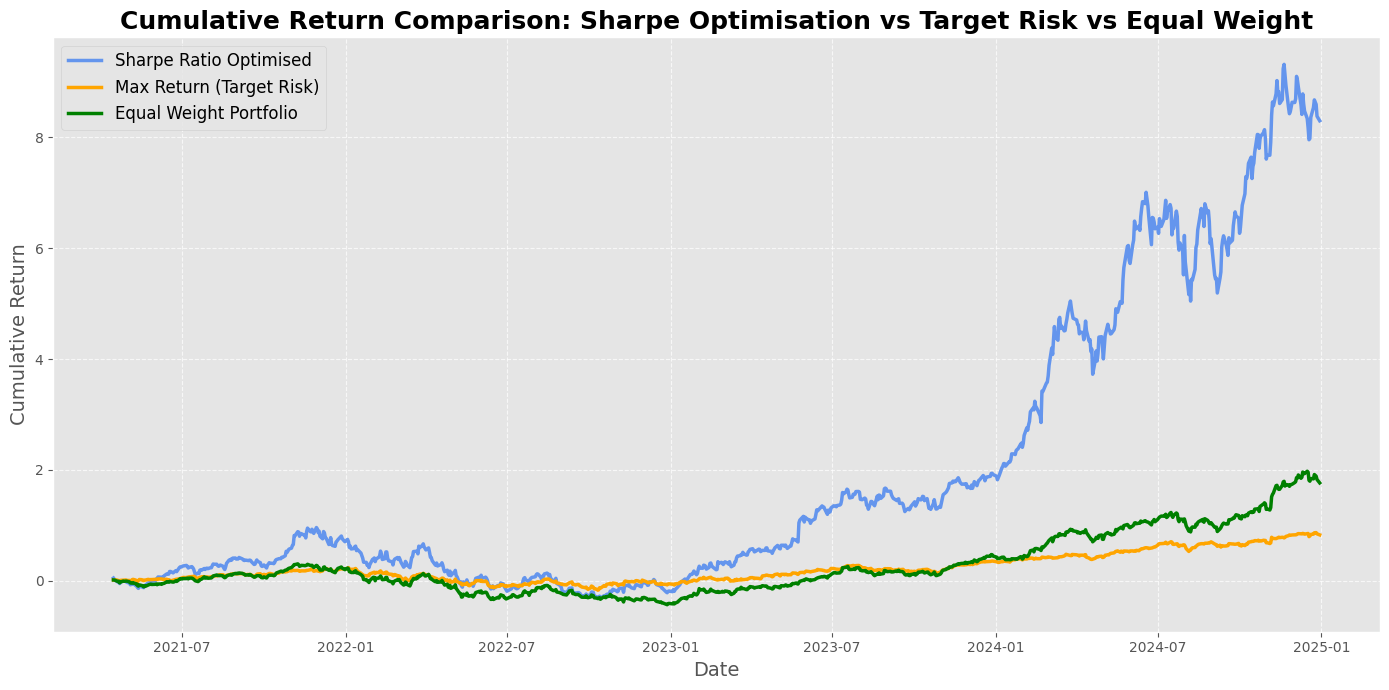

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(port_cumulative_daily_return_opt, label="Sharpe Ratio Optimised", linewidth=2.5, color="cornflowerblue")
plt.plot(port_cumulative_daily_return_opt_maxret, label="Max Return (Target Risk)", linewidth=2.5, color="orange")
plt.plot(cumulative_return, label="Equal Weight Portfolio", linewidth=2.5, color="green")

plt.title("Cumulative Return Comparison: Sharpe Optimisation vs Target Risk vs Equal Weight", fontsize=18, fontweight='bold')
plt.xlabel("Date", fontsize=14)
plt.ylabel("Cumulative Return", fontsize=14)
plt.legend(fontsize=12, frameon=True, loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()